# Task  #1 Prediction using Supervised ML

## Coded By :- Vinita Kumari Pal

## Problem Statement

#### *predict the percentage of an student based on the no. of study hours.

#### *What will be predicted score if a student studies for 9.25 hrs/day ?

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')

In [2]:
data = pd.read_csv('Student_score.csv')
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


## Data Exploration

In [3]:
data.shape # display the structure of data

(25, 2)

In [4]:
data.describe()  #Detailed view of Data

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [5]:
#Correlation etween data
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


## Distribution of Data using Plot 

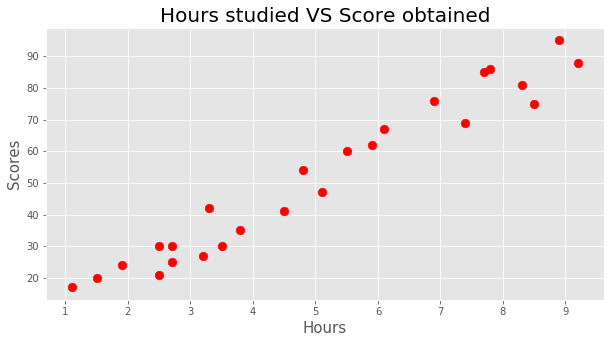

In [6]:
plt.figure(figsize=(10,5))
plt.title('Hours studied VS Score obtained', fontsize=20)
plt.xlabel('Hours',fontsize=15)
plt.ylabel('Scores',fontsize=15)
plt.scatter(data.Hours,data.Scores, s=75, color ='Red')
plt.show()

# Linear Regression

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

## Creating Training and test set

In [8]:
x = data.iloc[:,:-1].values
y = data.iloc[:,-1].values
print(f'x: {x.shape}')
print(f'y: {y.shape}')

x: (25, 1)
y: (25,)


In [9]:
# splitting dataset into training and test set
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)


In [10]:
col = ['x_train' , 'x_test', 'y_train', 'y_test']
tset = [x_train, x_test, y_train, y_test]
for i in range(len(col)):
    print(f'{col[i]}: {tset[i].shape}')

x_train: (20, 1)
x_test: (5, 1)
y_train: (20,)
y_test: (5,)


## Train and Test set Plot Distribution

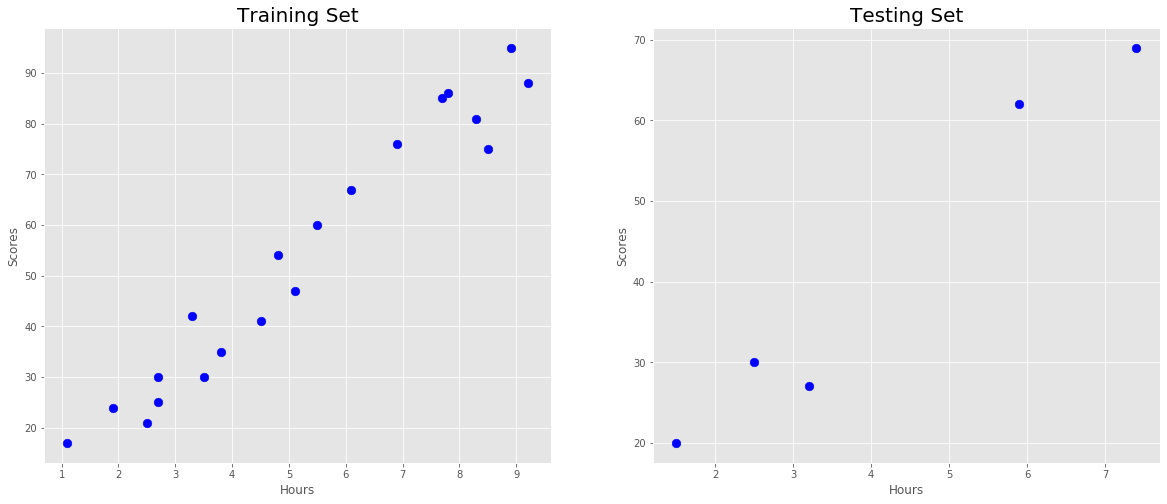

In [11]:
fig, ax = plt.subplots(1,2, figsize=(20,8))
ax[0].set_title('Training Set', fontsize=20)
ax[0].scatter(x_train, y_train, s=75, color='Blue')
ax[0].set_xlabel('Hours')
ax[0].set_ylabel('Scores')
ax[1].set_title('Testing Set', fontsize=20)
ax[1].scatter(x_test, y_test, s=75, color='Blue')
ax[1].set_xlabel('Hours')
ax[1].set_ylabel('Scores')
plt.show()

## Modeling and Fitting 

In [12]:
lr = LinearRegression()
lr.fit(x_train , y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
print(f'Coefficient: {lr.coef_}')
print(f'Intercept: {lr.intercept_}')

Coefficient: [9.91065648]
Intercept: 2.018160041434662


## Plotting Regression Line

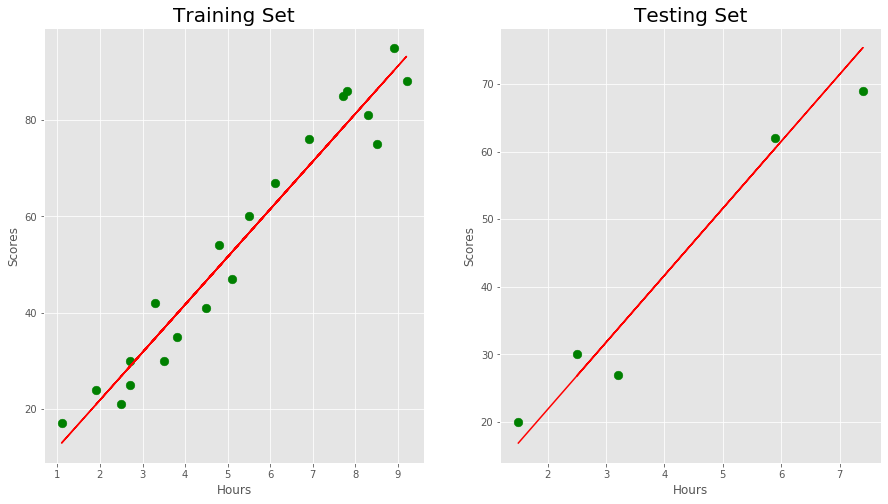

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(15,8))
ax[0].set_title('Training Set', fontsize= 20)
ax[0].scatter(x_train,y_train, s=75, color='Green')
ax[0].plot(x_train,lr.coef_*x_train + lr.intercept_, '-r')
ax[0].set_xlabel('Hours')
ax[0].set_ylabel('Scores')
ax[1].set_title('Testing Set', fontsize= 20)
ax[1].scatter(x_test,y_test, s=75, color='Green')
ax[1].plot(x_test,lr.coef_*x_test + lr.intercept_, '-r')
ax[1].set_xlabel('Hours')
ax[1].set_ylabel('Scores')
plt.show()

## Prediction 

In [15]:
y_pred = lr.predict(x_test).astype(int)
pd.DataFrame({'Hours': x_test[:,0], 'Actual Score': y_test,'Predicted Score': y_pred})

,Hours,Actual Score,Predicted Score
0,1.5,20,16
1,3.2,27,33
2,7.4,69,75
3,2.5,30,26
4,5.9,62,60


## Evaluation 

In [16]:
print(f'Mean Absolute Error(MAE): {metrics.mean_absolute_error(y_test,y_pred)}')
print(f'Residual Sum of Squares(MSE): {metrics.mean_squared_error(y_test,y_pred)}')
print(f'R2-Score: {metrics.r2_score(y_test,y_pred)}')

Mean Absolute Error(MAE): 4.4
Residual Sum of Squares(MSE): 21.6
R2-Score: 0.9454875832828589


## Predicted Score if Student study for 9.25 hrs/day ?

In [17]:
hours = 9.25
score = lr.predict([[hours]]).astype(int)
pd.DataFrame({'Hours': hours, 'Predicted Score': score})

,Hours,Predicted Score
0,9.25,93


#### if student studies for 9.25 hrs/day then he/she will score 93 in test.